## Examples

### Fig. 8 - Comparison with DIRECTFN-tri

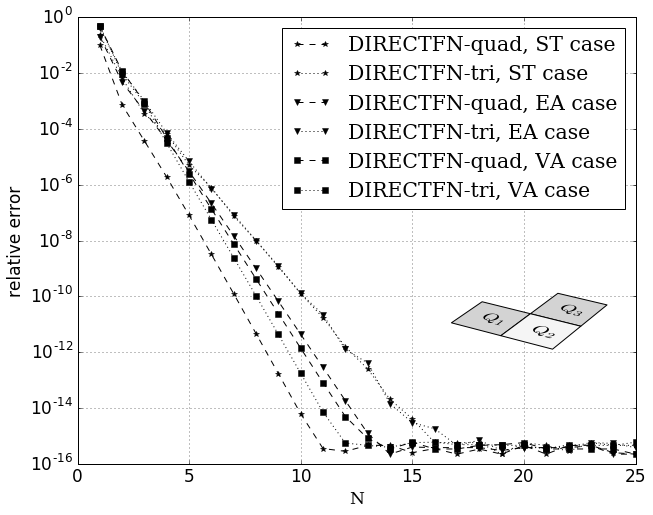

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
    

% matplotlib inline

from matplotlib.ticker import LinearLocator


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

VA_quad = np.loadtxt("Results_tri_vs_quad_va.txt")[:, 1]
VA_tri = np.loadtxt("Results_tri_vs_quad_va.txt")[:, 3]

EA_quad = np.loadtxt("Results_tri_vs_quad_ea.txt")[:, 1]
EA_tri = np.loadtxt("Results_tri_vs_quad_ea.txt")[:, 3]

ST_quad = np.loadtxt("Results_tri_vs_quad_st.txt")[:, 1]
ST_tri = np.loadtxt("Results_tri_vs_quad_st.txt")[:, 3]



fig_all = plt.figure(figsize = (10,8))

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(VA_quad)[0]+1)

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.plot(N,ST_quad,color = "k",linestyle = '--', marker = '*', label = "DIRECTFN-quad, ST case")
plt.plot(N,ST_tri,color = "k", linestyle = ':',marker = '*', label = "DIRECTFN-tri, ST case")

plt.plot(N,EA_quad,color = "k",marker = 'v', linestyle = "--", label = "DIRECTFN-quad, EA case")
plt.plot(N,EA_tri,color = "k",marker = 'v',linestyle = ":",label = "DIRECTFN-tri, EA case")

plt.plot(N,VA_quad,color = "k",marker = 's', linestyle = "--",label = "DIRECTFN-quad, VA case")
plt.plot(N,VA_tri,color = "k",marker = 's', linestyle = ":",label = "DIRECTFN-tri, VA case")

plt.xlabel("N",family = 'serif')
plt.ylabel("relative error")
#plt.title("Comparison with DIRECTFN")
plt.grid(True)
plt.legend()

ax = plt.axes([0.6, 0.3, 0.3, 0.3],projection='3d')
ax.patch.set_alpha(0.0)
P=[(0,0,0), (1, 0, 0), (1, 1, 0), (0, 1, 0), (2, 0, 0), (2, 1, 0), (2, 2, 0), (1, 2, 0)]
F=[[0,1,2,3],[1, 4, 5, 2], [2, 5, 6, 7]]

x = [t[0] for t in P]
y = [t[1] for t in P]
z = [t[2] for t in P]

pc=[[P[i] for i in f] for f in F]

#fz=getFaceMidpointsZ(pc)
fz = [0.27, 0.23]

q = Poly3DCollection(pc, linewidths=1)
q.set_facecolor(['lightgray','whitesmoke', 'lightgrey'])
ax.add_collection3d(q)

text3d(ax, (0.32, 0.4, 0), "$\mathrm{Q_1}$", zdir="z", size=.4, usetex=False,
       ec="none", fc="k")
text3d(ax, (1.32, 0.4, 0), "$\mathrm{Q_2}$", zdir="z", size=.4, usetex=False,
       ec="none", fc="k")
text3d(ax, (1.32, 1.4, 0), "$\mathrm{Q_3}$", zdir="z", size=.4, usetex=False,
       ec="none", fc="k")

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
ax.set_zlim(min(z),2)
ax.axis('off')

plt.show()

fig_all.savefig('Error_all.eps')

### Fig. 9 - CPU time

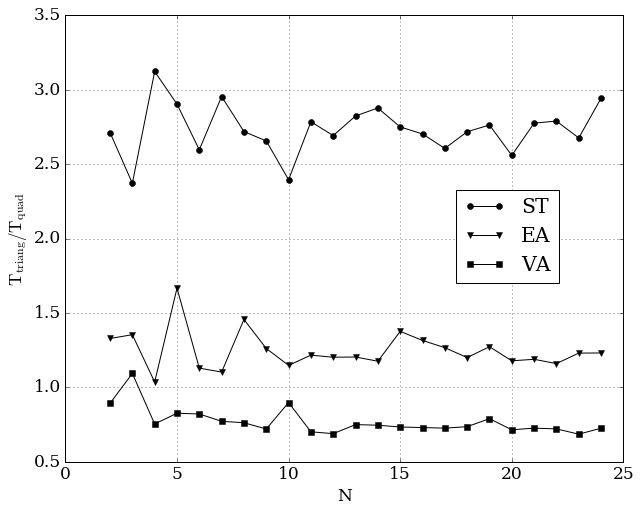

In [1]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

quad_EA =  np.loadtxt("Results_tri_vs_quad_EA.txt")[:, 2]
tri_EA = np.loadtxt("Results_tri_vs_quad_EA.txt")[:, 4]
quad_VA =  np.loadtxt("Results_tri_vs_quad_VA.txt")[:, 2]
tri_VA = np.loadtxt("Results_tri_vs_quad_VA.txt")[:, 4]
quad_ST =  np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 2]
tri_ST = np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 4]

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

fig = plt.figure(figsize = (10,8))
plt.subplot(111)
N = xrange(2,quad_EA.shape[0])
plt.plot(N,tri_ST[2:]/quad_ST[2:],color = "k",marker = 'o',label = 'ST')
plt.plot(N,tri_EA[2:]/quad_EA[2:],color = "k",marker = 'v',label = 'EA')
plt.plot(N,tri_VA[2:]/quad_VA[2:],color = "k",marker = 's',label = 'VA')
plt.xlabel("N")
plt.ylabel("$\mathrm{T_{triang}/T_{quad}}$")
    #plt.yscale("log")
#plt.title("CPU time")
plt.legend(loc = (0.7,0.4))
plt.grid(True)

fig.savefig("time.eps")


### Fig. 10 -  weakly singular integrals with vector basis functions, coincindent case

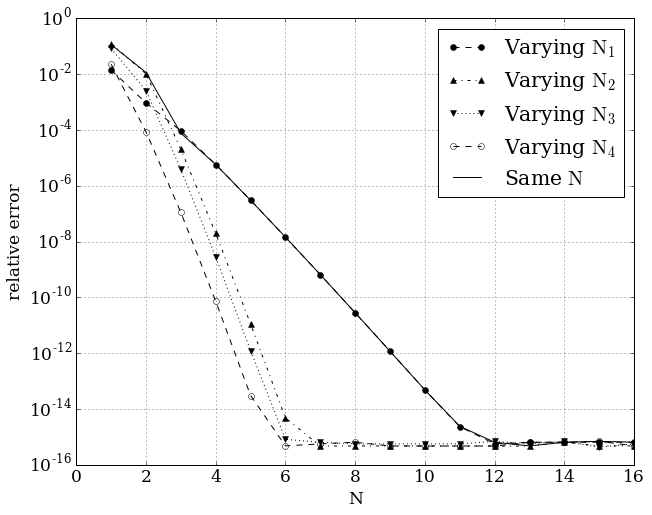

In [3]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

data_ST_const = np.loadtxt("Results_WS_ST_one_N.txt")


fig_ST_const = plt.figure(figsize = (10,8))
font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(data_ST_const)[0]+1)

plt.axis([0.,16.,1e-16,1.])

plt.plot(N,data_ST_const[:,2],color = "k",marker = 'o',linestyle = '--', label = 'Varying $\mathrm{N_1}$')
plt.plot(N,data_ST_const[:,3],color = "k",marker = '^',linestyle = '-.', label = 'Varying $\mathrm{N_2}$')
plt.plot(N,data_ST_const[:,4],color = "k",marker = 'v',linestyle = ':', label = 'Varying $\mathrm{N_3}$')
plt.plot(N,data_ST_const[:,5],color = "k",marker = 'o',markerfacecolor = 'none',linestyle = '--', label = 'Varying $\mathrm{N_4}$')
plt.plot(N,data_ST_const[:,1],color = "k", label = 'Same $\mathrm{N}$')

plt.xlabel("N")
plt.ylabel("relative error")
plt.grid(True)
plt.legend()

fig_ST_const.savefig('Error_one_param_ST_WS.eps')

### Fig.11 - strongly singular integrals with vector basis functions, edge adjacent case

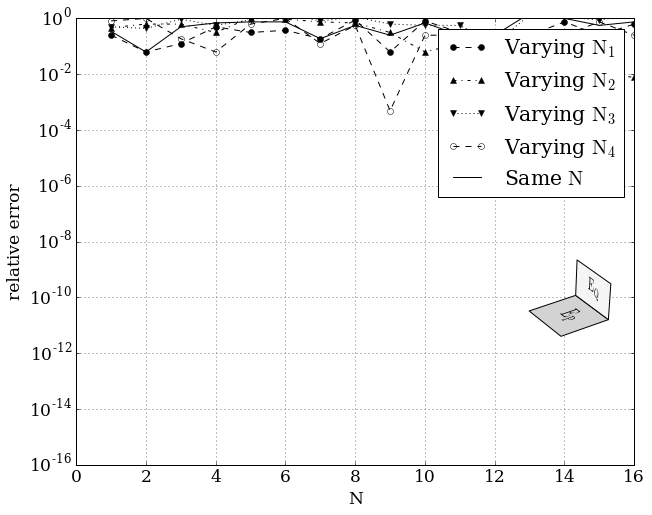

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

% matplotlib inline

from matplotlib.ticker import LinearLocator

data_EAo_SS = np.loadtxt("Results_SS_EA_one_N.txt")


fig_ST_const = plt.figure(figsize = (10,8))

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(data_EAo_SS)[0]+1)

plt.axis([0.,16.,1e-16,1.])

plt.plot(N,data_EAo_SS[:,2],color = "k",marker = 'o',linestyle = '--', label = 'Varying $\mathrm{N_1}$')
plt.plot(N,data_EAo_SS[:,3],color = "k",marker = '^',linestyle = '-.', label = 'Varying $\mathrm{N_2}$')
plt.plot(N,data_EAo_SS[:,4],color = "k",marker = 'v',linestyle = ':', label = 'Varying $\mathrm{N_3}$')
plt.plot(N,data_EAo_SS[:,5],color = "k",marker = 'o',markerfacecolor = 'none',linestyle = '--', label = 'Varying $\mathrm{N_4}$')
plt.plot(N,data_EAo_SS[:,1],color = "k", label = 'Same $\mathrm{N}$')

plt.xlabel("N")
plt.ylabel("relative error")
plt.grid(True)
plt.legend()



def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)



ax = plt.axes([0.6, 0.3, 0.3, 0.3],projection='3d')
ax.patch.set_alpha(0.0)
P=[(0,1,0),(2,1,0),(2,2,0),(0,2,0),(0,2,1),(2,2,1),(0,0,1),(-2,2,0),(-2,2,1)]
F=[[0,1,2,3],[2,3,4,5]]

x = [t[0] for t in P]
y = [t[1] for t in P]
z = [t[2] for t in P]

pc=[[P[i] for i in f] for f in F]

#fz=getFaceMidpointsZ(pc)
fz = [0.27, 0.23]

q = Poly3DCollection(pc, linewidths=1)
q.set_facecolor(['lightgray','whitesmoke'])
ax.add_collection3d(q)


#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
ax.set_zlim(min(z),2)
ax.axis('off')

text3d(ax, (0.73, 1.4, 0), "$\mathrm{E_P}$", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (0.8, 1.97, 0.48), "$\mathrm{E_Q}$", zdir="y", size=.5, usetex=False,
       angle=0.0, ec="none", fc="k")

ax.view_init(elev=38., azim=-33.)
plt.show()

fig_ST_const.savefig('Error_one_param_EAo_SS.eps')

### Fig.12 - strongly singular integrals with vector basis functions, vertex adjacent case

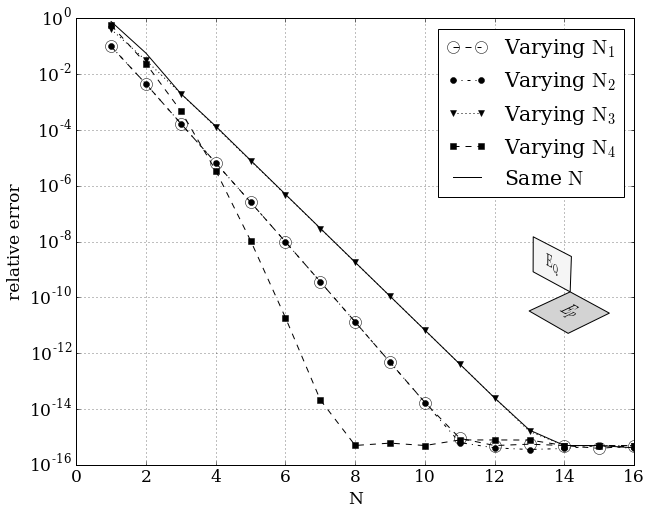

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

% matplotlib inline

def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

    
def getColors(m,a):
    b=m.to_rgba(a)
    return [(i[0],i[1],i[2]) for i in b]


data_VAo_SS = np.loadtxt("Results_SS_VA_one_N.txt")


fig_VAo_SS = plt.figure(figsize = (10,8))

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(data_VAo_SS)[0]+1)

plt.axis([0.,16.,1e-16,1.])

plt.plot(N,data_VAo_SS[:,2],color = "k",marker = 'o',markersize = 12, fillstyle ='none',linestyle = '--', label = 'Varying $\mathrm{N_1}$')
plt.plot(N,data_VAo_SS[:,3],color = "k",marker = 'o',linestyle = '-.', label = 'Varying $\mathrm{N_2}$')
plt.plot(N,data_VAo_SS[:,4],color = "k",marker = 'v',linestyle = ':', label = 'Varying $\mathrm{N_3}$')
plt.plot(N,data_VAo_SS[:,5],color = "k",marker = 's',linestyle = '--', label = 'Varying $\mathrm{N_4}$')
plt.plot(N,data_VAo_SS[:,1],color = "k", label = 'Same $\mathrm{N}$')

plt.xlabel("N")
plt.ylabel("relative error")
plt.grid(True)
plt.legend()

ax = plt.axes([0.6, 0.3, 0.3, 0.3],projection='3d')
ax.patch.set_alpha(0.0)
P=[(0,1,0),(2,1,0),(2,2,0),(0,2,0),(0,2,1),(2,2,1),(0,0,1),(-2,2,0),(-2,2,1)]
#F=[[0,1,2,3],[2,3,4,5],[4,8,7,3]]
F=[[0,1,2,3],[4,8,7,3]]

x = [t[0] for t in P]
y = [t[1] for t in P]
z = [t[2] for t in P]

pc=[[P[i] for i in f] for f in F]

#fz=getFaceMidpointsZ(pc)
fz = [0.27, 0.23]

q = Poly3DCollection(pc, linewidths=1)

q.set_facecolor(['lightgray','whitesmoke'])
ax.add_collection3d(q)


#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))
ax.set_zlim(min(z),2)
ax.axis('off')

text3d(ax, (0.7, 1.4, 0), "$\mathrm{E_P}$", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (-1.3,2,0.4), "$\mathrm{E_Q}$", zdir="y", size=.5, usetex=False,
       angle=0.0, ec="none", fc="k")

ax.view_init(elev=38., azim=-42.)
plt.show()

fig_VAo_SS.savefig('Error_one_param_VAo_SS.eps')

### Fig. 13 - Example with curvilinear patches

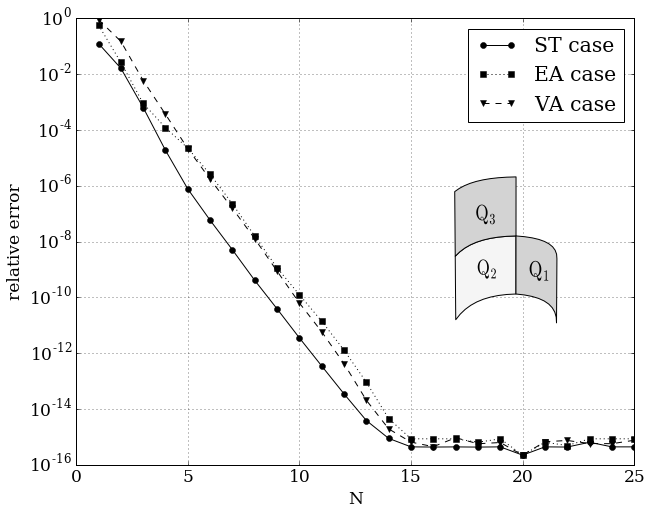

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

% matplotlib inline

from matplotlib.ticker import LinearLocator

ST_curv = np.loadtxt("Results_st_curv.txt")[:, 1]
EA_curv = np.loadtxt("Results_ea_curv.txt")[:, 1]
VA_curv = np.loadtxt("Results_va_curv.txt")[:, 1]

fig_ST_curv = plt.figure(figsize = (10,8))

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(ST_curv)[0]+1)

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.plot(N,ST_curv,marker = 'o', linestyle = '-', color = "k", label = 'ST case')
plt.plot(N,EA_curv,marker = 's', linestyle = ':', color = "k", label = 'EA case')
plt.plot(N,VA_curv,color = "k", marker = 'v', linestyle = '--',label = 'VA case')
plt.legend()

plt.xlabel("N")
plt.ylabel("relative error")
#plt.title("Comparison with DIRECTFN for triangles")
plt.grid(True)

ax = plt.axes([0.6, 0.3, 0.25, 0.4],projection='3d')
ax.patch.set_alpha(0.0)




def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)




# Make data.
u = np.linspace(-1, 1, 10)

v = np.linspace(-1, 1, 10)

u, v = np.meshgrid(u, v)


d = 1
dd = d / np.sqrt((2.0))
r1 =  [ d, 0.0, 0.0 ]
r2 = [ d, 0.0, 0.5*d ]
r3 = [d, 0.0, d  ]

r4 = [dd,dd,0.0  ]
r5 = [dd, dd, 0.5*d ]
r6 = [dd, dd, d ]
r7 = [0.0, d, 0.0]
r8 = [0.0, d, 0.5*d ]
r9 = [0.0, d, d]

N11 = (1 - u)*(1 - v)*u*v / (4.0)
N21 = -(1 - u*u)*(1 - v)*v / (2.0)
N31 = -(1 + u)*(1 - v)*u*v / (4.0)
N12 = -(1 - u)*(1 - v*v)*u / (2.0)
N22 = (1 - u*u)*(1 - v*v)
N32 = (1 + u)*(1 - v*v)*u / (2.0)

N13 = -(1 - u)*(1 + v)*u*v / (4.0)
N23 = (1 - u*u)*(1 + v)*v/ (2.0)
N33 = (1 + u)*(1 + v)*u*v / (4.0)
    
Q1 = np.zeros((3,np.int(N11.shape[0]), np.int(N11.shape[1])))
for i in xrange(Q1.shape[0]):
    Q1[i,:,:] = r1[i]*N11 + r2[i]*N21 + r3[i]*N31 + r4[i]*N12 + r5[i]*N22 + r6[i]*N32 + r7[i]*N13 + r8[i]*N23 + r9[i]*N33
    
r10 = [-dd, dd, 0.0]
r11 = [-dd, dd, 0.5*d]
r12 = [-dd, dd, d]
r13 = [-d, 0.0, 0.0]
r14 = [-d, 0.0, 0.5*d]
r15 = [-d, 0.0, d]
 
Q2 = np.zeros((3,np.int(N11.shape[0]), np.int(N11.shape[1])))
for i in xrange(Q2.shape[0]):
    Q2[i,:,:,] = r7[i]*N11 + r8[i]*N21 + r9[i]*N31 + r10[i]*N12 + r11[i]*N22 + r12[i]*N32 + r13[i]*N13 + r14[i]*N23 + r15[i]*N33

r16 = [0.0, d, 1.5*d]
r17 = [0.0, d, 2.0*d]
r18 = [-dd, dd, d]
r19 = [-dd, dd, 1.5*d]
r20 = [-dd, dd, 2.0*d]
r21 = [-d, 0.0, d]
r22 = [-d, 0.0, 1.5*d]
r23 = [-d, 0.0, 2.0*d]

Q3 = np.zeros((3,np.int(N11.shape[0]), np.int(N11.shape[1])))
for i in xrange(Q3.shape[0]):
    Q3[i, :, :] = r9[i]*N11 + r16[i]*N21 + r17[i]*N31 + r18[i]*N12 + r19[i]*N22 + r20[i]*N32 + r21[i]*N13 + r22[i]*N23 + r23[i]*N33

    
surf1 = ax.plot_surface(Q1[0,:,:],Q1[1,:,:],Q1[2,:,:], color = 'lightgrey',shade = False )

surf2 = ax.plot_surface(Q2[0,:,:],Q2[1,:,:],Q2[2,:,:], color = 'whitesmoke',shade = False )
surf3 = ax.plot_surface(Q3[0,:,:],Q3[1,:,:],Q3[2,:,:], color = 'lightgrey',shade = False )

# Customize the z axis.
ax.set_zlim(0, 2)
#ax.w_zaxis.set_major_locator(LinearLocator(6))

#plt.xlim([-400, 400])
#plt.ylim([-400, 400])
ax.axis('off')
ax.view_init(elev=10., azim=-84.)

text3d(ax, (0.2,1.5,0.1), "$\mathrm{Q_1}$", zdir="y", size=.4, usetex=False,
       angle=0.0, ec="none", fc="k")

text3d(ax, (-1.1,1.9,-0.05), "$\mathrm{Q_2}$", zdir="y", size=.4, usetex=False,
       angle=0.0, ec="none", fc="k")


text3d(ax, (-1.1,1.8,1.0), "$\mathrm{Q_3}$", zdir="y", size=.4, usetex=False,
       angle=0.0, ec="none", fc="k")


plt.show()


fig_ST_curv.savefig('Error_curv.eps')

## Test with different shape

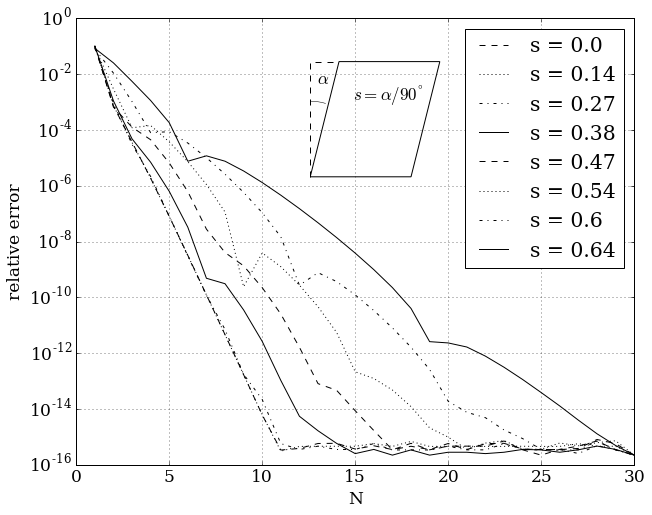

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from itertools import cycle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

import matplotlib.patches as patches
from matplotlib.patches import Arc
    

% matplotlib inline

from matplotlib.ticker import LinearLocator


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

    
names  = ['Results_different_shape_{}.txt'.format(m) for m in range(1,9)]

data = []
for name in names:
    data.append(np.loadtxt(name)[:,1])


fig_all = plt.figure(figsize = (10,8))
font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(data[0])[0]+1)

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

lines = ['--',':','-.','-']
#markers = ['o','s','v','^']
linecycler = cycle(lines)
step = 0.229
srange = [round(np.arctan(step*(m-1))*2/np.pi,2)  for m in xrange(1,9)];
labels = ['s = {}'.format(s) for s in srange ]
#markercycler = cycle(markers)
for m in xrange(8):
    plt.plot(N, data[m],color = "k",ls = next(linecycler),label = labels[m])



plt.xlabel("N",family = 'serif')
plt.ylabel("relative error")
#plt.title("Comparison with DIRECTFN")
plt.grid(True)
plt.legend()

ax = plt.axes([0.45, 0.6, 0.2, 0.25])
ax.axis('off')
d = 0.4
x = d*np.array([0., 0.7, 0.9, 0.2])
y = d*np.array([0.1, 0.1, 0.9, 0.9])
ax.add_patch(patches.Polygon(xy = zip(x,y), fill = False))

x2 = np.array([x[0],x[0],x[3]])
y2 = np.array([y[0],y[3],y[3]])
ax.plot(x2,y2, '--', color ='black')

# Ellipse parameters
R = 0.3
x, y = 0.0, 0.1
a, b = R, R
ax.add_patch(Arc((x, y), a, b,
                 theta1=90.0 - np.arctan(0.3)*180./np.pi, theta2=90.0, edgecolor='k',linestyle = '-',lw = 0.5
                ))
ax.text(0.02,0.3,r'$\alpha$')
ax.text(0.12,0.25,r'$s = \alpha/90^{\degree}$')



plt.show()

fig_all.savefig('shape.eps')
fig_all.savefig('shape.jpg')